<a href="https://colab.research.google.com/github/Canihelpme/DeepLearning_finance/blob/main/LSTM_Kospi_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
from pathlib import Path

folder = ""
project_dir = ""

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/My Drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [6]:
%matplotlib inline
filename = '/content/drive/MyDrive/Financial_data/Data/train/ko_train.csv'
data = pd.read_csv(filename, sep=",",encoding='UTF-8')
data.head

<bound method NDFrame.head of                Date       End      Open      High       Low   Amount     Val
0     2020년 02월 21일  2,162.84  2,165.65  2,184.43  2,160.28  635.47M  -1.49%
1     2020년 02월 20일  2,195.50  2,223.55  2,228.18  2,186.72  709.56M  -0.67%
2     2020년 02월 19일  2,210.34  2,222.51  2,226.00  2,191.20  591.16M   0.07%
3     2020년 02월 18일  2,208.88  2,225.98  2,232.93  2,205.21  470.42M  -1.48%
4     2020년 02월 17일  2,242.17  2,243.07  2,250.05  2,230.26  458.25M  -0.06%
...             ...       ...       ...       ...       ...      ...     ...
5994  1996년 04월 25일    964.69    957.56    977.44    957.56   57.17M   0.84%
5995  1996년 04월 24일    956.61     940.5    956.65    934.53   46.24M   1.71%
5996  1996년 04월 23일    940.55    951.47    957.95    940.55   52.69M  -1.06%
5997  1996년 04월 22일    950.61    941.75    957.61    941.75   57.15M   0.95%
5998  1996년 04월 20일    941.69     948.6    952.21    941.66   42.81M  -0.70%

[5999 rows x 7 columns]>

In [7]:
date_index = data
date_index = date_index.copy()
print(date_index)

               Date       End      Open      High       Low   Amount     Val
0     2020년 02월 21일  2,162.84  2,165.65  2,184.43  2,160.28  635.47M  -1.49%
1     2020년 02월 20일  2,195.50  2,223.55  2,228.18  2,186.72  709.56M  -0.67%
2     2020년 02월 19일  2,210.34  2,222.51  2,226.00  2,191.20  591.16M   0.07%
3     2020년 02월 18일  2,208.88  2,225.98  2,232.93  2,205.21  470.42M  -1.48%
4     2020년 02월 17일  2,242.17  2,243.07  2,250.05  2,230.26  458.25M  -0.06%
...             ...       ...       ...       ...       ...      ...     ...
5994  1996년 04월 25일    964.69    957.56    977.44    957.56   57.17M   0.84%
5995  1996년 04월 24일    956.61     940.5    956.65    934.53   46.24M   1.71%
5996  1996년 04월 23일    940.55    951.47    957.95    940.55   52.69M  -1.06%
5997  1996년 04월 22일    950.61    941.75    957.61    941.75   57.15M   0.95%
5998  1996년 04월 20일    941.69     948.6    952.21    941.66   42.81M  -0.70%

[5999 rows x 7 columns]


In [8]:
date_index['Date'] = date_index.Date.apply(str).str.replace("년","").str.replace("월","").str.replace("일","")
date_index['Date'] = date_index.Date.str.replace(" ","")

date_index['Amount'] = date_index.Amount.apply(str).str.replace("B", "0000000").str.replace("M","0000").str.replace("K","0").str.replace(".","")
date_index['Amount'] = date_index.Amount.astype(int)

date_index['End'] = date_index.End.apply(str).str.replace(",","").astype(float)
date_index['Open'] = date_index.Open.apply(str).str.replace(",","").astype(float)
date_index['High'] = date_index.High.apply(str).str.replace(",","").astype(float)
date_index['Low'] = date_index.Low.apply(str).str.replace(",","").astype(float)

date_index = date_index.loc[::-1].reset_index(drop=True)
print(date_index)

          Date      End     Open     High      Low     Amount     Val
0     19960420   941.69   948.60   952.21   941.66   42810000  -0.70%
1     19960422   950.61   941.75   957.61   941.75   57150000   0.95%
2     19960423   940.55   951.47   957.95   940.55   52690000  -1.06%
3     19960424   956.61   940.50   956.65   934.53   46240000   1.71%
4     19960425   964.69   957.56   977.44   957.56   57170000   0.84%
...        ...      ...      ...      ...      ...        ...     ...
5994  20200217  2242.17  2243.07  2250.05  2230.26  458250000  -0.06%
5995  20200218  2208.88  2225.98  2232.93  2205.21  470420000  -1.48%
5996  20200219  2210.34  2222.51  2226.00  2191.20  591160000   0.07%
5997  20200220  2195.50  2223.55  2228.18  2186.72  709560000  -0.67%
5998  20200221  2162.84  2165.65  2184.43  2160.28  635470000  -1.49%

[5999 rows x 7 columns]


In [9]:
date_index['Date'] = pd.to_datetime(date_index['Date'], format='%Y%m%d')
#date_index['year'] = date_index['date'].dt.year
date_index = date_index.set_index('Date')
print(date_index)

                End     Open     High      Low     Amount     Val
Date                                                             
1996-04-20   941.69   948.60   952.21   941.66   42810000  -0.70%
1996-04-22   950.61   941.75   957.61   941.75   57150000   0.95%
1996-04-23   940.55   951.47   957.95   940.55   52690000  -1.06%
1996-04-24   956.61   940.50   956.65   934.53   46240000   1.71%
1996-04-25   964.69   957.56   977.44   957.56   57170000   0.84%
...             ...      ...      ...      ...        ...     ...
2020-02-17  2242.17  2243.07  2250.05  2230.26  458250000  -0.06%
2020-02-18  2208.88  2225.98  2232.93  2205.21  470420000  -1.48%
2020-02-19  2210.34  2222.51  2226.00  2191.20  591160000   0.07%
2020-02-20  2195.50  2223.55  2228.18  2186.72  709560000  -0.67%
2020-02-21  2162.84  2165.65  2184.43  2160.28  635470000  -1.49%

[5999 rows x 6 columns]


# LSTM을 활용한 주가 예측 모델


LSTM 을 활용한 주가 예측 모델 구축

## 데이터

In [10]:
stock = date_index

In [11]:
stock.head()

,End,Open,High,Low,Amount,Val
Date,,,,,,
1996-04-20,941.69,948.60,952.21,941.66,42810000,-0.70%
1996-04-22,950.61,941.75,957.61,941.75,57150000,0.95%
1996-04-23,940.55,951.47,957.95,940.55,52690000,-1.06%
1996-04-24,956.61,940.50,956.65,934.53,46240000,1.71%
1996-04-25,964.69,957.56,977.44,957.56,57170000,0.84%


In [12]:
stock.tail()


,End,Open,High,Low,Amount,Val
Date,,,,,,
2020-02-17,2242.17,2243.07,2250.05,2230.26,458250000,-0.06%
2020-02-18,2208.88,2225.98,2232.93,2205.21,470420000,-1.48%
2020-02-19,2210.34,2222.51,2226.00,2191.20,591160000,0.07%
2020-02-20,2195.50,2223.55,2228.18,2186.72,709560000,-0.67%
2020-02-21,2162.84,2165.65,2184.43,2160.28,635470000,-1.49%


In [13]:
stock.index

DatetimeIndex(['1996-04-20', '1996-04-22', '1996-04-23', '1996-04-24',
               '1996-04-25', '1996-04-26', '1996-04-27', '1996-04-29',
               '1996-04-30', '1996-05-02',
               ...
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21'],
              dtype='datetime64[ns]', name='Date', length=5999, freq=None)

위에서 보시는 바와 같이 index가 `DatetimeIndex`로 지정되어 있습니다.

`DatetimeIndex`로 정의되어 있다면, 아래와 같이 연도, 월, 일을 쪼갤 수 있으며, **월별, 연도별 피벗데이터**를 만들때 유용하게 활용할 수 있습니다.

In [14]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [15]:
stock.head()

,End,Open,High,Low,Amount,Val,Year,Month,Day
Date,,,,,,,,,
1996-04-20,941.69,948.60,952.21,941.66,42810000,-0.70%,1996,4,20
1996-04-22,950.61,941.75,957.61,941.75,57150000,0.95%,1996,4,22
1996-04-23,940.55,951.47,957.95,940.55,52690000,-1.06%,1996,4,23
1996-04-24,956.61,940.50,956.65,934.53,46240000,1.71%,1996,4,24
1996-04-25,964.69,957.56,977.44,957.56,57170000,0.84%,1996,4,25


## 시각화

Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


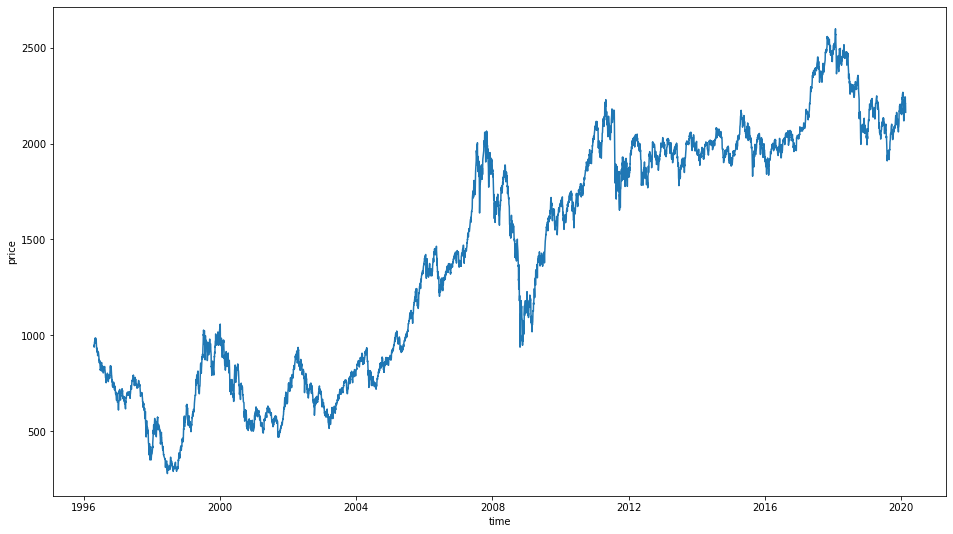

In [16]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['End'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


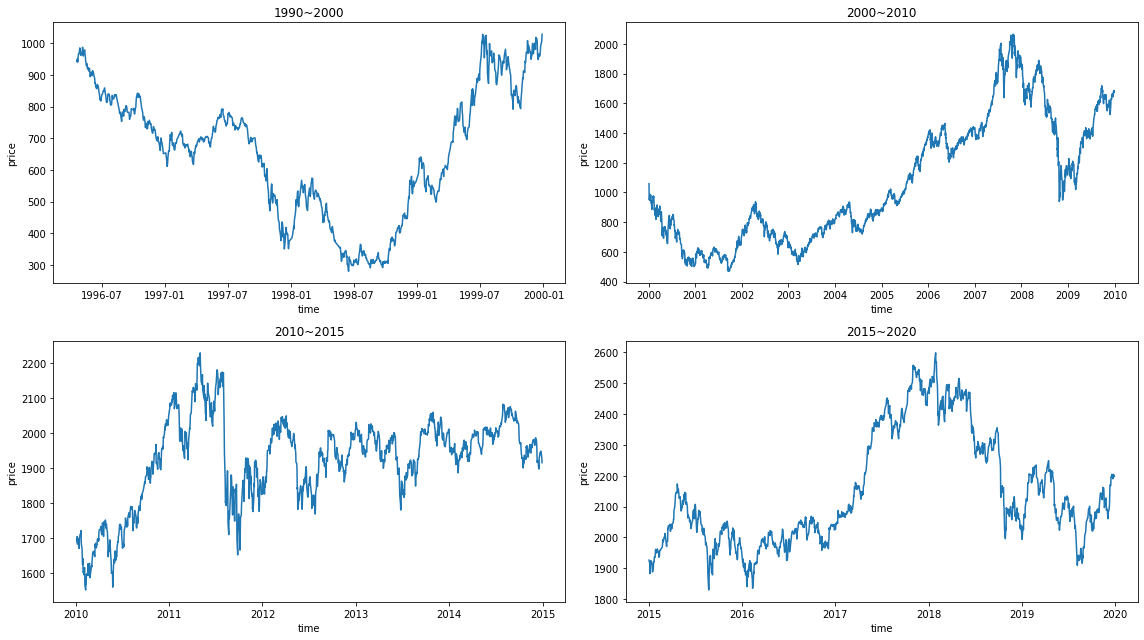

In [17]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['End'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## 데이터 전처리

주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 **정규화(Normalization)**를 해주도록 하겠습니다.

**표준화 (Standardization)**와 **정규화(Normalization)**에 대한 내용은 아래 링크에서 더 자세히 다루니, 참고해 보시기 바랍니다.

- [데이터 전처리에 관하여](https://teddylee777.github.io/scikit-learn/scikit-learn-preprocessing)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = [ 'Open', 'High', 'Low','End', 'Amount']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.2883355 , 0.28548113, 0.28754902, 0.28543389, 0.01791633],
       [0.28536628, 0.28781265, 0.28758798, 0.28928172, 0.02394197],
       [0.28957954, 0.28795945, 0.28706854, 0.28494213, 0.02206789],
       ...,
       [0.84052883, 0.83545544, 0.82843328, 0.83269275, 0.24833216],
       [0.84097963, 0.83639669, 0.82649404, 0.8262912 , 0.29808366],
       [0.8158821 , 0.81750709, 0.81504904, 0.81220262, 0.26695115]])

스케일이 완료된 column으로 새로운 데이터프레임을 생성합니다.

**시간 순으로 정렬**되어 있으며, datetime index는 제외했습니다.

*6,000개의 row, 5개 column*으로 이루어진 데이터셋이 DataFrame으로 정리되었습니다.

In [19]:
df = pd.DataFrame(scaled, columns=scale_cols)

## train / test 분할

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('End', 1), df['End'], test_size=0.2, random_state=0, shuffle=False)

In [22]:
x_train.shape, y_train.shape

((4799, 4), (4799,))

In [23]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [24]:
x_train

,Open,High,Low,Amount
0,0.288336,0.285481,0.287549,0.017916
1,0.285366,0.287813,0.287588,0.023942
2,0.289580,0.287959,0.287069,0.022068
3,0.284824,0.287398,0.284463,0.019358
4,0.292219,0.296374,0.294432,0.023950
...,...,...,...,...
4794,0.755674,0.749643,0.752976,0.188580
4795,0.755609,0.752242,0.753513,0.184630
4796,0.762419,0.758127,0.759625,0.233529
4797,0.759423,0.754733,0.756335,0.228011


## TensroFlow Dataset을 활용한 시퀀스 데이터셋 구성








In [25]:
import tensorflow as tf

In [26]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

Hyperparameter를 정의

In [27]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [28]:
# trian_data는 학습용, test_data는 검증용
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [29]:
# 아래의 코드로 데이터셋의 구성을 확인
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


## 모델

In [30]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, Input, RepeatVector
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [31]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [32]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [35]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    145/Unknown - 12s 6ms/step - loss: 0.0019 - mse: 0.0039
Epoch 1: val_loss improved from inf to 0.00026, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 14s 16ms/step - loss: 0.0019 - mse: 0.0038 - val_loss: 2.5657e-04 - val_mse: 5.1315e-04
Epoch 2/50
147/150 [============================>.] - ETA: 0s - loss: 1.6960e-04 - mse: 3.3921e-04
Epoch 2: val_loss did not improve from 0.00026
150/150 [==============================] - 1s 8ms/step - loss: 1.6965e-04 - mse: 3.3929e-04 - val_loss: 3.0389e-04 - val_mse: 6.0777e-04
Epoch 3/50
144/150 [===========================>..] - ETA: 0s - loss: 1.3456e-04 - mse: 2.6912e-04
Epoch 3: val_loss improved from 0.00026 to 0.00022, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 1s 8ms/step - loss: 1.3805e-04 - mse: 2.7611e-04 - val_loss: 2.1703e-04 - val_mse: 4.3405e-04
Epoch 4/50
150/150 [==============================] - ETA: 0s - loss: 1.3306e-04 - mse: 2.6611e-04
Epoc

저장한 ModelCheckpoint 를 로드합니다.

In [36]:
model.load_weights(filename)

`test_data`를 활용하여 예측을 진행합니다.




In [37]:
pred = model.predict(test_data)

In [38]:
pred.shape

(1180, 1)

## 예측 데이터 시각화

아래 시각화 코드중 y_test 데이터에 **[20:]**으로 슬라이싱을 한 이유는

예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 *앞의 20일은 예측하지 않습니다.*

따라서, 20번 째 index와 비교하면 더욱 정확합니다.

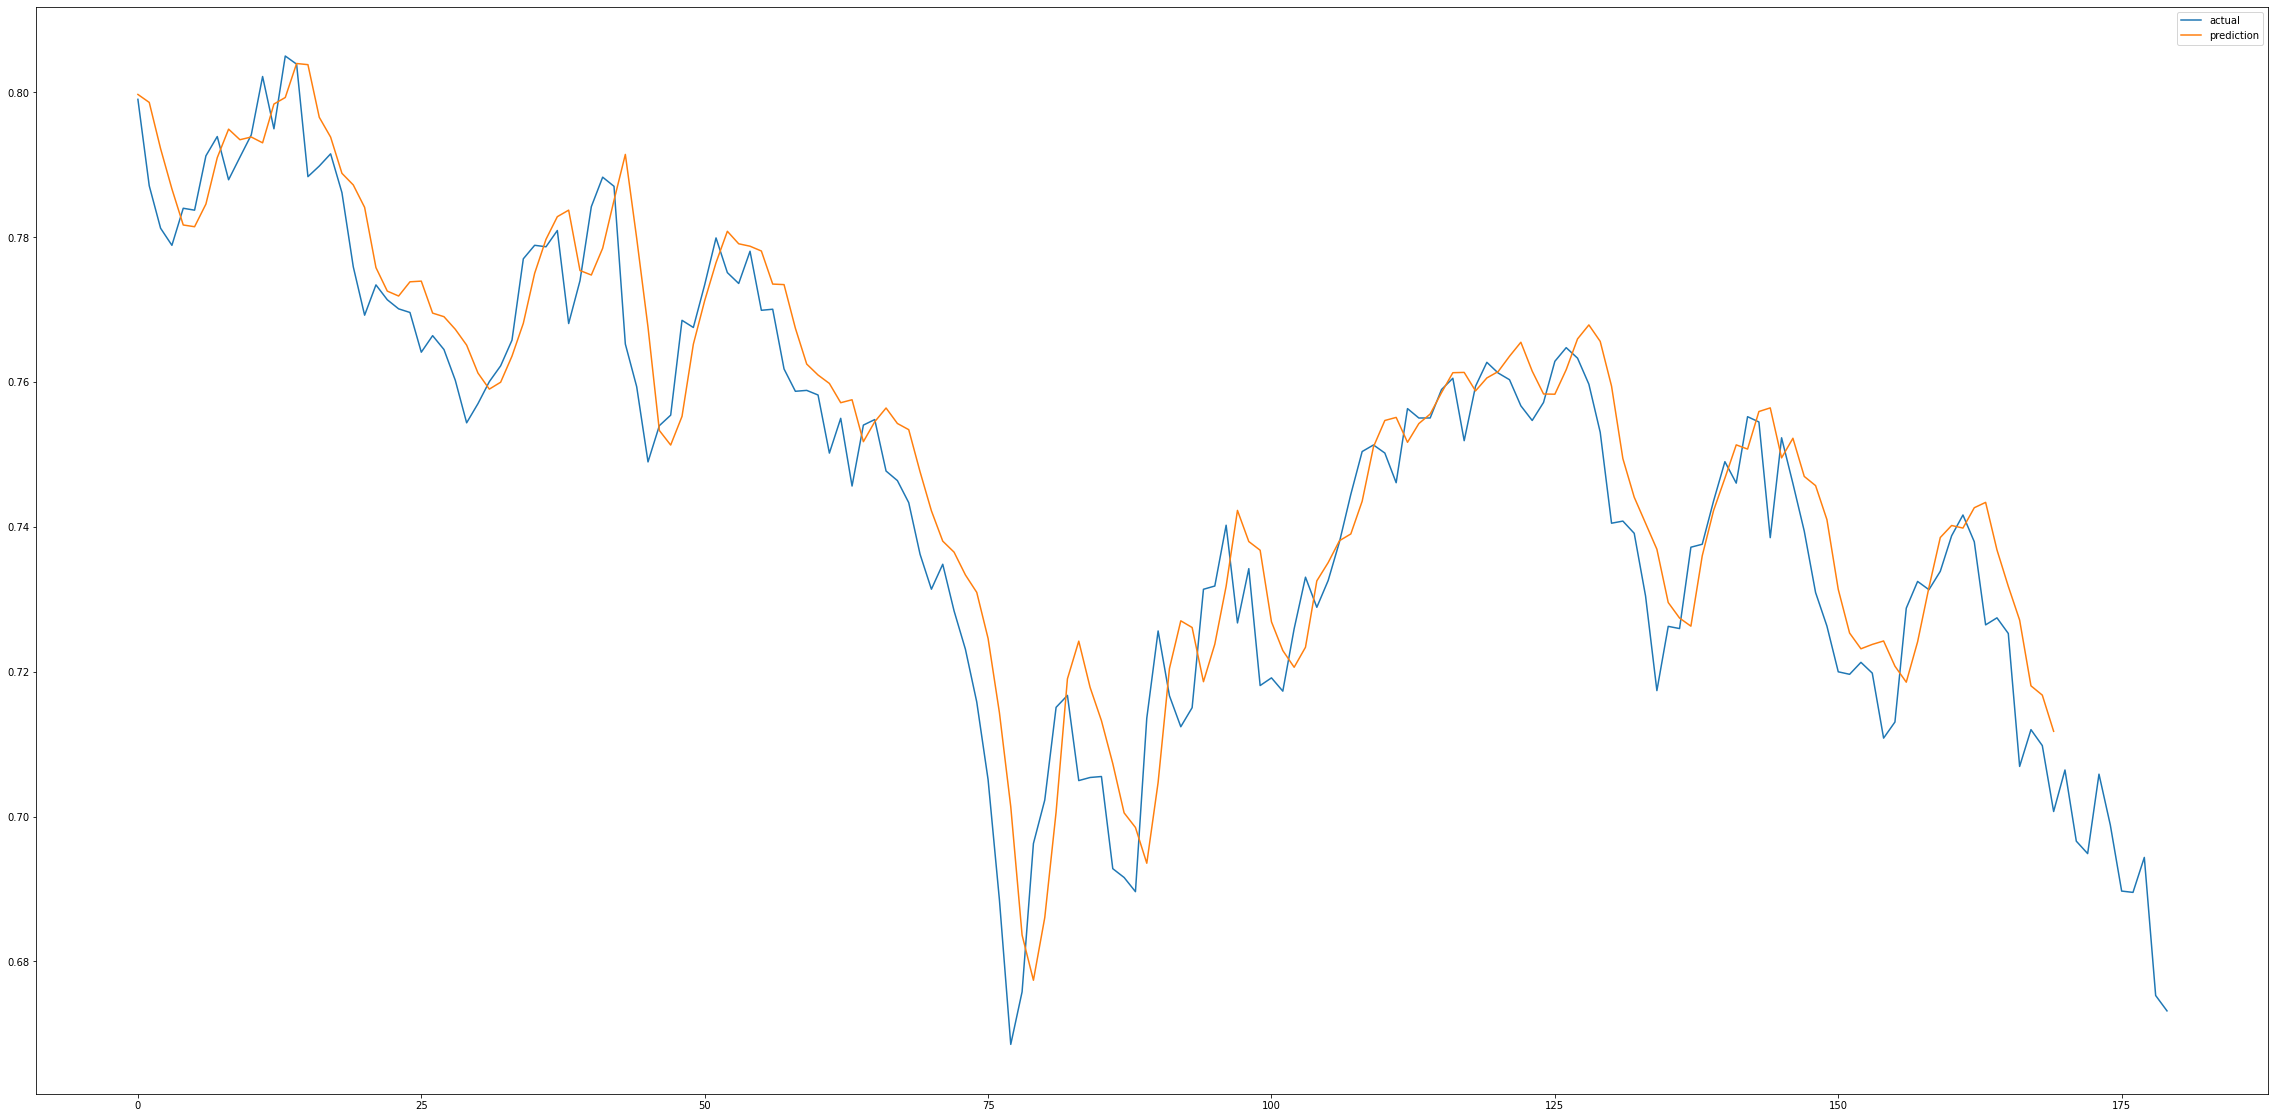

In [42]:
plt.figure(figsize=(40, 20))
plt.plot(np.asarray(y_test)[20:200], label='actual')
plt.plot(pred[:170], label='prediction')
plt.legend()
plt.show()

#AutoEncoder

In [52]:
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu', input_shape = (4,)),
    tf.keras.layers.Dense(3, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = None)
])

decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation = 'relu', input_shape = (2,)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = None)
])

autoencoder = tf.keras.models.Sequential([encoder, decoder])

In [53]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = 'mean_squared_error',
                    metrics = ['mse'])

In [54]:
training = autoencoder.fit(x_train, x_train, batch_size = 32, epochs = 50)


Epoch 1/50
150/150 [==============================] - 3s 3ms/step - loss: 0.1049 - mse: 0.1049
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0496 - mse: 0.0496
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0466 - mse: 0.0466
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0339 - mse: 0.0339
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0049
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 8/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025
Epoch 9/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 10/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 11/50
150/150 [============================

In [56]:
test_scores = autoencoder.evaluate(x_train, x_train, verbose = 2)
print('Test loss: {}'.format(test_scores[0]))
print('Mean Squared Error: {} %'.format(test_scores[1]*100))

150/150 - 1s - loss: 0.0021 - mse: 0.0021 - 542ms/epoch - 4ms/step
Test loss: 0.0021310325246304274
Mean Squared Error: 0.21310325246304274 %


#LSTM Encoder

In [46]:
encoding_dim = 3

inputs = Input(shape=(WINDOW_SIZE, 1))
encoded = LSTM(encoding_dim)(inputs)

decoded = RepeatVector(WINDOW_SIZE)(encoded)
decoded = LSTM(1, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)
sequence_autoencoder.summary()

sequence_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = sequence_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test, x_test))

decoded_stocks = sequence_autoencoder.predict(x_test)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 lstm_10 (LSTM)              (None, 3)                 60        
                                                                 
 repeat_vector_2 (RepeatVect  (None, 20, 3)            0         
 or)                                                             
                                                                 
 lstm_11 (LSTM)              (None, 20, 1)             20        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


ValueError: ignored